In [1]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Import numpy
import numpy as np

# Import pandas for data handling
import pandas as pd

import os

# Import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [2]:
from train_valid_test_loader import load_train_valid_test_datasets

DATA_PATH = 'data_movie_lens_100k/' # TODO fixme: Path to where dataset csv files live on your system (unless in working directory)
assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))

In [3]:
# Importing the movie dataset
train_tuple, test_tuple, valid_tuple, n_users, n_items = load_train_valid_test_datasets(data_path=DATA_PATH)

# Check size of each split
n_train = len(train_tuple[0])
n_valid = len(valid_tuple[0])
n_test = len(test_tuple[0])

print("n_train", f"{n_train}")
print("n_valid", f"{n_valid}")
print("n_test", f"{n_test}")

n_train 70000
n_valid 10000
n_test 9992


In [4]:
# Create the model
model = CollabFilterOneVectorPerItem(n_epochs=6, batch_size=10000, step_size=0.1, n_factors=2)

# Initialize the parameters
model.init_parameter_dict(n_users, n_items, train_tuple)
hasattr(model, 'param_dict')

True

In [5]:
model.param_dict

{'mu': array([3.53058571]),
 'b_per_user': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [6]:
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     0.00052 | tr RMSE     2.29508 | va RMSE     2.31696 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.143 | loss_total     0.00053 | tr RMSE     2.29504 | va RMSE     2.31693 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.286 | loss_total     0.00053 | tr RMSE     2.29501 | va RMSE     2.31689 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.429 | loss_total     0.00053 | tr RMSE     2.29497 | va RMSE     2.31686 | grad_wrt_mu     0.00040 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.571 | loss_total     0.00052 | tr RMSE     2.29494 | va RMSE  

In [7]:
# Here we show at which epochs we collected a snapshot of model performance
model.trace_epoch

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.857142857142857,
 1.0,
 1.1428571428571428,
 1.2857142857142856,
 1.4285714285714284,
 1.5714285714285712,
 1.714285714285714,
 1.8571428571428568,
 2.0,
 2.571428571428571,
 3.0,
 3.571428571428571,
 4.0,
 4.571428571428573,
 5.0,
 5.571428571428573,
 5.857142857142859]

In [8]:
model.trace_rmse_train

[2.295078000907855,
 2.2950431442850765,
 2.295008039926914,
 2.2949730661873353,
 2.2949378723521403,
 2.294903020759623,
 2.2948680331294553,
 2.294833084896573,
 2.2947983298275867,
 2.2947633593013603,
 2.294727982478612,
 2.2946928133698137,
 2.2946585042971783,
 2.294623381260148,
 2.2945882115508835,
 2.29444793674785,
 2.294343380908435,
 2.2942031144030857,
 2.2940985929342013,
 2.2939587966168236,
 2.293853847592967,
 2.2937138043197365,
 2.293644075875079]

(0.0, 3.0)

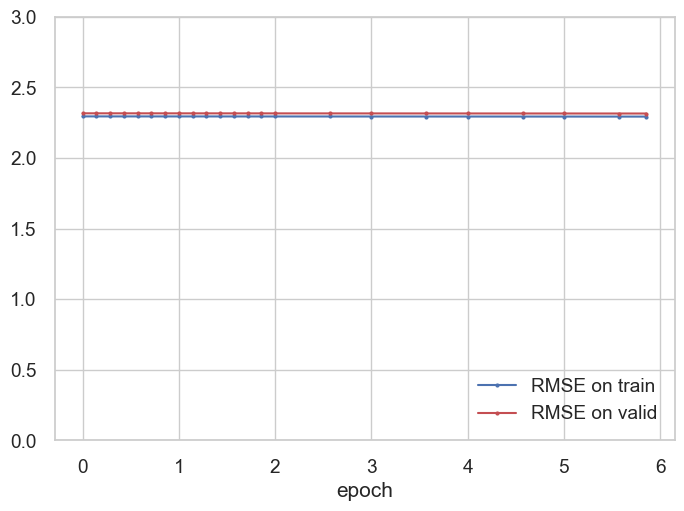

In [9]:
# Plots to Look at error vs. epoch

plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')

plt.xlabel('epoch');
plt.legend(loc='lower right');
plt.ylim([0, 3])

Users: 943  | Items: 1682
Train size: 70000
Valid size: 9992
Test size: 10000
epoch       0.000 | loss_total     0.00116 | tr RMSE     1.12578 | va RMSE     1.12339 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00111 | tr RMSE     1.12578 | va RMSE     1.12339 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00113 | tr RMSE     1.12578 | va RMSE     1.12339 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00113 | tr RMSE     1.12578 | va RMSE     1.12339 | grad_wrt_mu     0.00000 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.0000

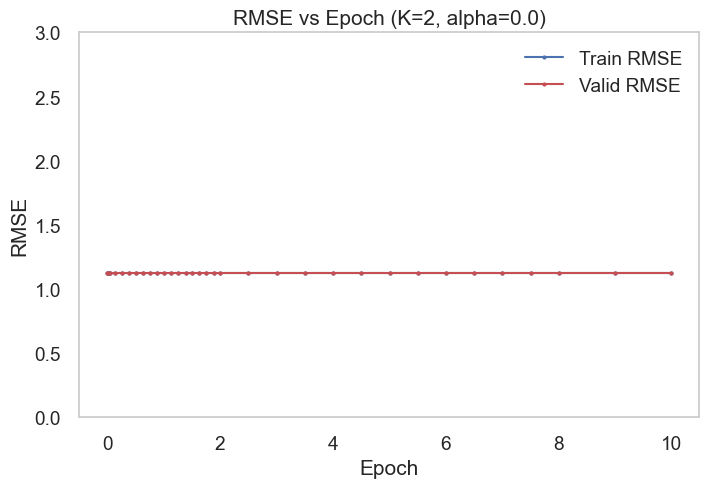

Train RMSE = 1.1258 | MAE = 0.9444
Valid RMSE = 1.1234 | MAE = 0.9447
Test RMSE = 1.1273 | MAE = 0.9457
Could not load movie metadata for embeddings plot: [Errno 2] No such file or directory: 'data_movie_lens_100k/item_info.csv'


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets
import pandas as pd

# ============================================================
# 1. Load dataset
# ============================================================
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

print("Users:", n_users, " | Items:", n_items)
print("Train size:", train_tuple[0].size)
print("Valid size:", valid_tuple[0].size)
print("Test size:", test_tuple[0].size)

# ============================================================
# 2. Train model (example: K=2, alpha=0)
# ============================================================
K = 2
alpha = 0.0
step_size = 0.1
batch_size = 1000
epochs = 10

model = CollabFilterOneVectorPerItem(
    n_epochs=epochs,
    batch_size=batch_size,
    step_size=step_size,
    n_factors=K,
    alpha=alpha,
)

model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

# ============================================================
# 3. Plot RMSE vs epoch for training + validation
# ============================================================
plt.figure(figsize=(8,5))
plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label="Train RMSE")
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label="Valid RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title(f"RMSE vs Epoch (K={K}, alpha={alpha})")
plt.legend()
plt.ylim([0, 3])
plt.grid()
plt.show()

# ============================================================
# 4. Evaluate final performance (train/valid/test)
# ============================================================
def evaluate_split(split_tuple, name):
    u, v, y = split_tuple
    yhat = model.predict(u, v)
    rmse = np.sqrt(np.mean((yhat - y)**2))
    mae = np.mean(np.abs(yhat - y))
    print(f"{name} RMSE = {rmse:.4f} | MAE = {mae:.4f}")
    return rmse, mae

rmse_tr, mae_tr = evaluate_split(train_tuple, "Train")
rmse_va, mae_va = evaluate_split(valid_tuple, "Valid")
rmse_te, mae_te = evaluate_split(test_tuple, "Test")

# ============================================================
# 5. Part 1D: Visualize 2D movie embeddings (only works when K=2)
# ============================================================
if model.n_factors == 2:
    try:
        movie_info = pd.read_csv("data_movie_lens_100k/item_info.csv")
        select_movies = pd.read_csv("data_movie_lens_100k/select_movies.csv")

        movie_ids = select_movies["item_id"].values
        movie_titles = select_movies["title"].values

        V = model.param_dict["V"]  # shape: (n_items, 2)

        emb = V[movie_ids]

        plt.figure(figsize=(10,7))
        plt.scatter(emb[:,0], emb[:,1], c='blue')

        for i, title in enumerate(movie_titles):
            plt.text(emb[i,0]+0.01, emb[i,1]+0.01, title, fontsize=10)

        plt.title("2D Movie Embeddings (K=2)")
        plt.xlabel("Factor 1")
        plt.ylabel("Factor 2")
        plt.grid()
        plt.show()

    except Exception as e:
        print("Could not load movie metadata for embeddings plot:", e)
else:
    print("Embedding scatter plot only available when K=2")
